In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Homework 3

### Task 1. 

In this task we want to look at data on three different flower species. 

In [2]:
df_iris = pd.read_csv("IRIS.csv")

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Nice quick access to mean, standard deviation, n=150.

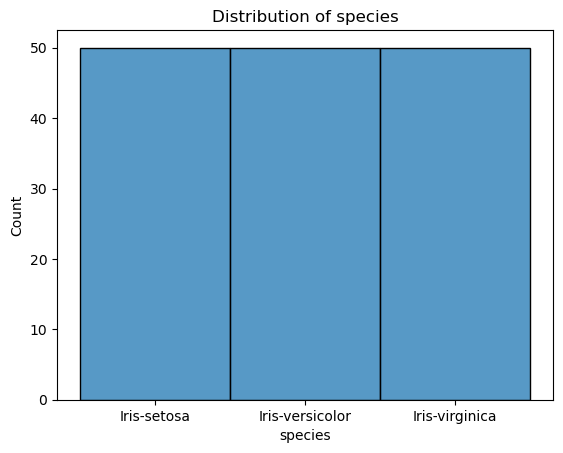

In [6]:
sns.histplot(df_iris['species'])
plt.title('Distribution of species')
plt.show()

Text(0.5, 1.0, 'sepal_width vs petal_width')

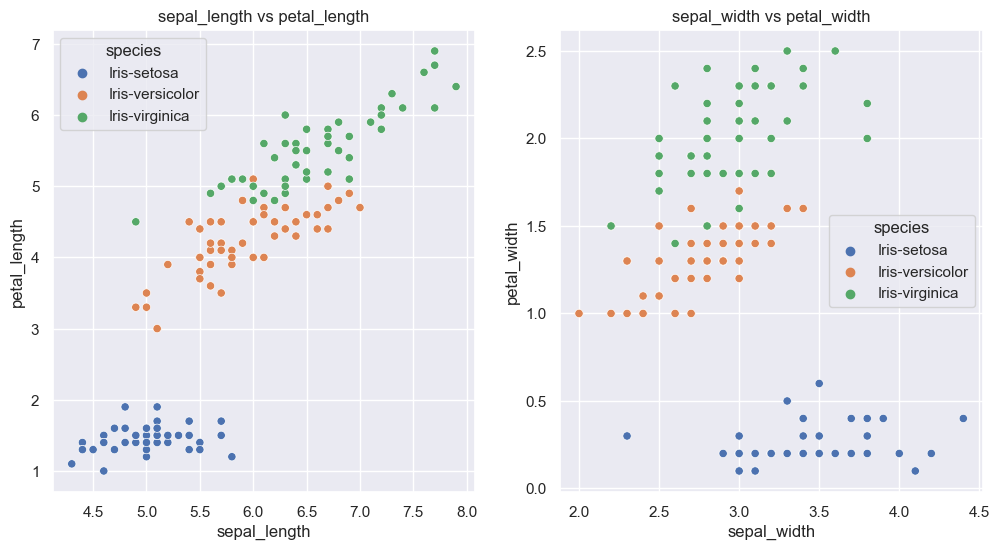

In [7]:
sns.set(style="darkgrid") # set style

# create fig with 2 subplots
fig, axes = plt.subplots(1, 2, figsize =(12, 6))

# Plot (petal = kronblad, sepal = foderblad) width and height in scatterplot 
sns.scatterplot(data=df_iris, x="sepal_length", y="petal_length", hue="species", ax=axes[0])
axes[0].set_title("sepal_length vs petal_length")

sns.scatterplot(data=df_iris, x="sepal_width", y="petal_width", hue="species", ax=axes[1])
axes[1].set_title("sepal_width vs petal_width")

##### Conclusion: 
From looking at the plot above we can see that the species are very distictly grouped. 
etcetcetc



Text(0.5, 1.0, 'Petal Length vs Species')

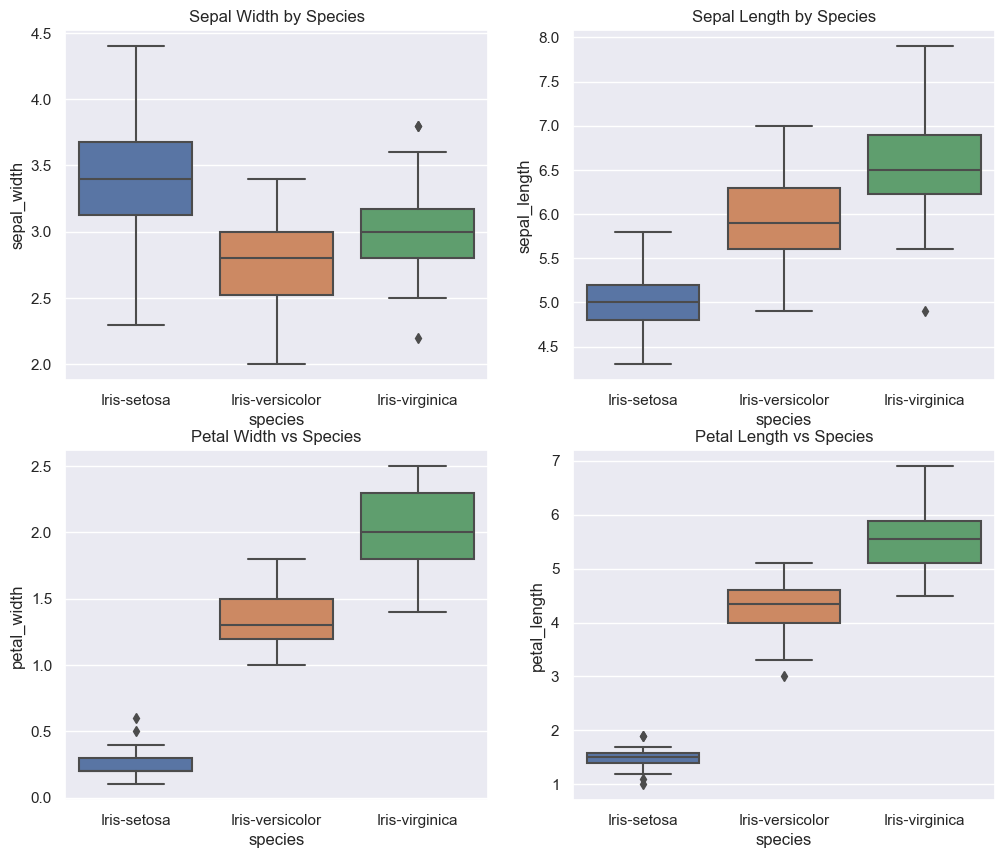

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# foderbladsbredd vs species
sns.boxplot(data=df_iris, x="species", y="sepal_width", ax=axes[0, 0])
axes[0, 0].set_title("Sepal Width by Species")

# foderbladslängd vs species
sns.boxplot(data=df_iris, x="species", y="sepal_length", ax=axes[0,1])
axes[0,1].set_title("Sepal Length by Species")

# kronbladsbredd vs species
sns.boxplot(data=df_iris, x="species", y="petal_width", ax=axes[1,0])
axes[1,0].set_title("Petal Width vs Species")

# kronbladslängd vs species
sns.boxplot(data=df_iris, x="species", y="petal_length", ax=axes[1,1])
axes[1,1].set_title("Petal Length vs Species")

#### Conclusion: 
The Iris Setosa has the widest sepals but are shorter in length compared to the other species, and their petals are significantly smaller. 
The Iris Virginica has the longest sepals, as well as widest and longest petals out of the three species but their sepal width falls somewhere in the middle. 
The Iris Versicolors petal and sepal dimensions fall somewhere in the middle of the three species. Overall they're distinctly seperated in based on sepal and petal size. 

/Users/learlo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


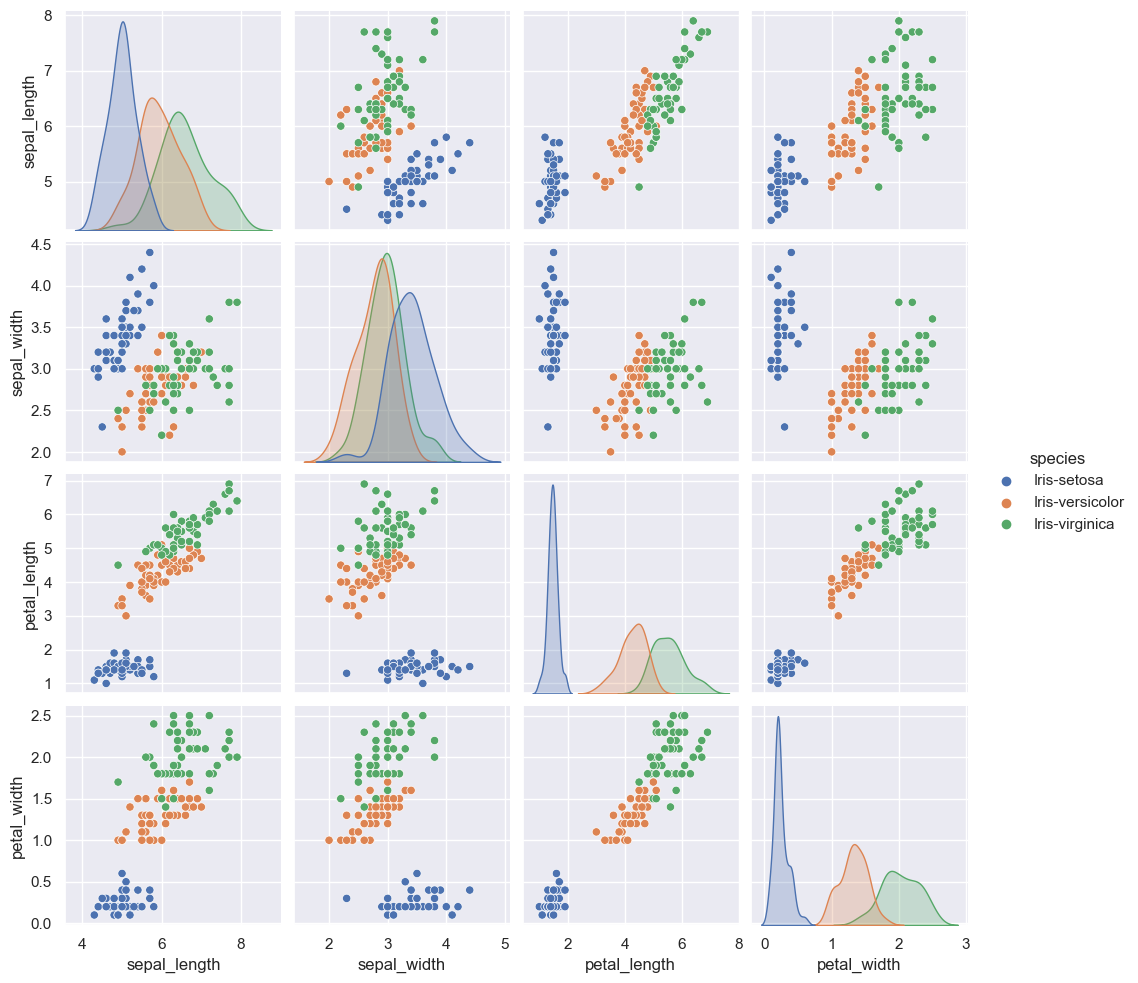

In [9]:
# generating a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(12,10))

# create pairplot
sns.pairplot(df_iris, hue="species", height=2.5)

# closes some weird 4x4 window that appeared. 
plt.close(1)

#### Conclusion: 
We can see that sepal width and height are somewhat correlated while the petal dimensions seem to be more strongly correlated. Petal size seem to be generally larger for all species. 

### Task 2. 
In this problem we'll be looking at data from bird sitings at the royal national park in 2022. 

In [10]:
# Loading the data, delimiter is \t as it seems to be a tab issue 
df_ap = pd.read_csv("artportalen.csv")

In [11]:
df_ap.head(5)

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin


In [12]:
# Clean up the data a little, removed some columns. 
df_ap_cleaned = df_ap[["Provins", "Antal", "Artnamn", "Församling","Startdatum", "Slutdatum", 
                       "Ostkoordinat", "Nordkoordinat", "Lokalnamn"]]
df_ap_cleaned.head(5)

,Provins,Antal,Artnamn,Församling,Startdatum,Slutdatum,Ostkoordinat,Nordkoordinat,Lokalnamn
0,Uppland,2,Koltrast,Solna,2022-01-01,2022-01-01,1626890,6586736,"Björnstigen 129,Bergshamra,Solna"
1,Uppland,2,Blåmes,Solna,2022-01-01,2022-01-01,1626890,6586736,"Björnstigen 129,Bergshamra,Solna"
2,Uppland,1,Koltrast,Solna,2022-01-01,2022-01-01,1626094,6585523,Frösundavik
3,Uppland,1,Sparvhök,Solna,2022-01-01,2022-01-01,1626094,6585523,Frösundavik
4,Uppland,2,Skata,Solna,2021-12-30,2022-01-01,1626780,6585860,Tivoli


In [13]:
# Finding the most prevalent species by using groupby and then .size() that sums # of occurences.
# Then we sort based on the most occuring. 
species_count = df_ap_cleaned.groupby("Artnamn").size().sort_values(ascending=False)
print(species_count.head(5))

Artnamn
Koltrast      718
Talgoxe       631
Blåmes        629
Gräsand       531
Storskrake    522
dtype: int64


Koltransen seem to be the most sighted species. 

In [14]:
# Make time object 
# Create a deep copy of the DataFrame to avoid SettingWithCopyWarning
df_ap_cleaned = df_ap[["Provins", "Antal", "Artnamn", "Församling", "Startdatum", "Slutdatum", "Lokalnamn"]].copy()

# Convert 'Startdatum' to datetime
df_ap_cleaned['Startdatum'] = pd.to_datetime(df_ap_cleaned['Startdatum'], errors='coerce')

# Extract the month from 'Startdatum'
df_ap_cleaned['Month'] = df_ap_cleaned['Startdatum'].dt.month

# Extract top 3 species
top_3_species = species_count.head(3).index

# Setup monthly distribution of top 3 species
monthly_distribution = (
    df_ap_cleaned[df_ap_cleaned['Artnamn'].isin(top_3_species)]
    .groupby(['Month', 'Artnamn'])
    .size()
    .unstack(fill_value=0)
)

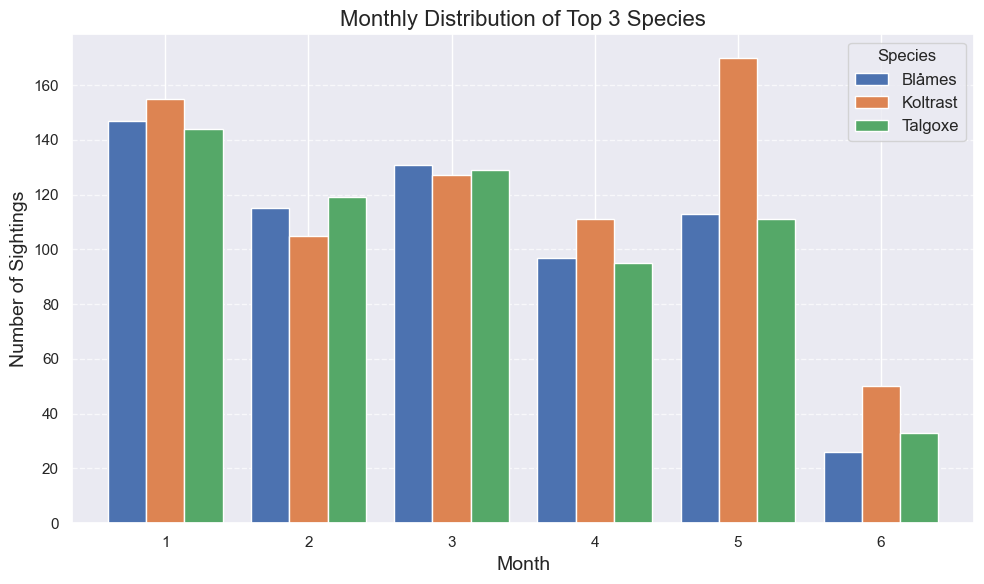

In [15]:
# Plot the monthly distribution
monthly_distribution.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title("Monthly Distribution of Top 3 Species", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Sightings", fontsize=14)
plt.xticks(rotation=0)  # Keep month labels horizontal for clarity
plt.legend(title="Species", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From the plot above we can see the distribution of the top 3 sighted species, Koltrasten is for example sighted the most in May, while Blåmes seem to be sighted more in Mars for example. 

In [16]:
# Count occurrences of each species
species_count2 = df_ap_cleaned.groupby("Artnamn").size().sort_values()
# Display the rarest species
print("Rarest species:")
print(species_count2.head(36))  # Adjust the number to see more rare species

Rarest species:
Artnamn
Strömstare                   1
Gravand                      1
Trädlärka                    1
Tornfalk                     1
Gråhakedopping               1
Prutgås                      1
Storlom                      1
Spillkråka                   1
Knipskrake                   1
Spetsbergsgås                1
Kustlabb                     1
Forsärla                     1
Lappsparv                    1
Mellanskarv                  1
Måsfåglar                    1
Nordlig gulärla              1
Rödbena                      1
Röd glada                    1
Rosenfink                    1
Ob. bo-/bergfink             1
Ob. fisk-/silvertärna        1
Ob. gås                      1
Ob. korsnäbb                 1
Ljungpipare                  1
Fjällvråk                    1
Ormvråk, underarten buteo    1
Tundrasädgås                 1
Ejder                        1
Fiskgjuse                    1
Bivråk                       1
Doppingfåglar                1
Bändelkorsnäbb 

Above is a list of the least sighted species, there are a total of 35 species sighted only once. 

#### Question 1: 
For our first question we can ask what the most commons församling is for bird sightings and if they differ for the top 3 species? 

In [17]:
# First we count bird sightings by församling
forsamling_distr = df_ap_cleaned.groupby('Församling').size().sort_values(ascending=False)

# Then we check which församling added the most to top 3. 
top_3_forsamling = (
    df_ap_cleaned[df_ap_cleaned['Artnamn'].isin(top_3_species)]
    .groupby(['Församling', 'Artnamn'])
    .size()
    .unstack(fill_value=0)
    .sum(axis=1)
    .sort_values(ascending=False)
    .head(5)
)
# Show
print(forsamling_distr.head(3))
print(top_3_forsamling.head(3))

Församling
Stockholm     15434
Solna          4033
Sollentuna     2292
dtype: int64
Församling
Stockholm     1468
Sollentuna     276
Solna          233
dtype: int64


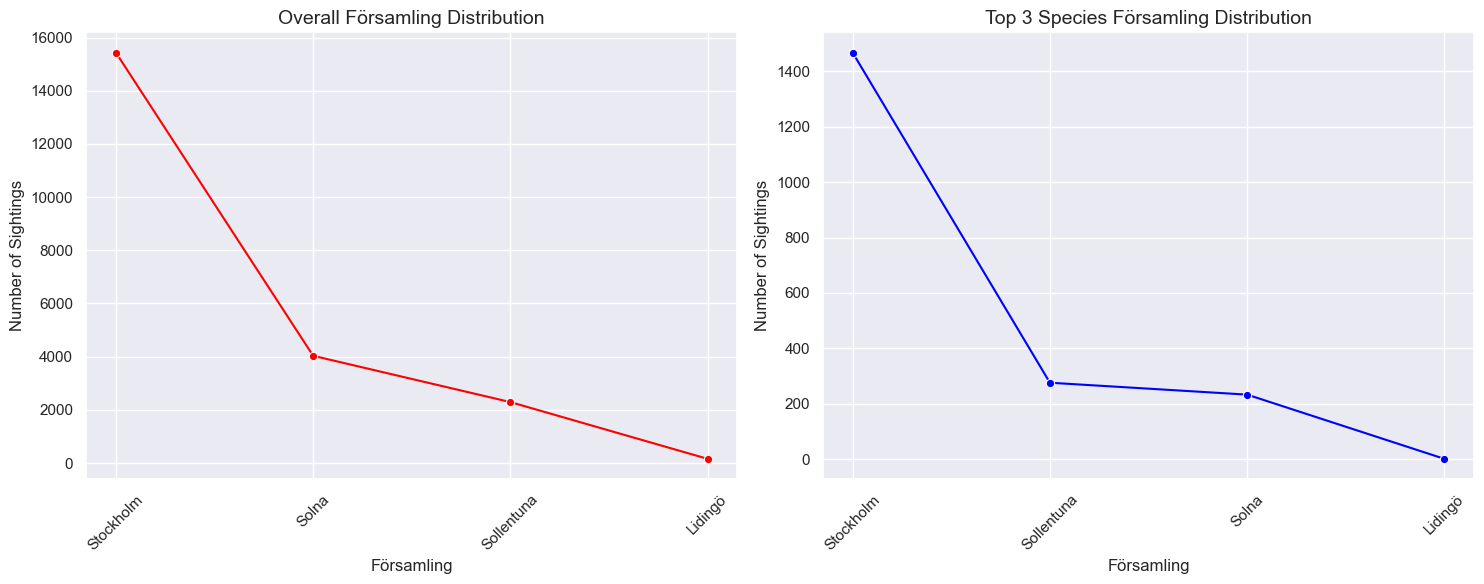

In [18]:
# Plotting
# Prepare data
overall_data = forsamling_distr.head(10)
top_3_data = top_3_forsamling

# Create a 1x2 layout for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Overall församling distribution (Left)
sns.lineplot(ax=axes[0], x=overall_data.index, y=overall_data.values, color='red', marker='o')
axes[0].set_title("Overall Församling Distribution", fontsize=14)
axes[0].set_xlabel("Församling", fontsize=12)
axes[0].set_ylabel("Number of Sightings", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Top 3 species' församling distribution (Right)
sns.lineplot(ax=axes[1], x=top_3_data.index, y=top_3_data.values, color='blue', marker='o')
axes[1].set_title("Top 3 Species Församling Distribution", fontsize=14)
axes[1].set_xlabel("Församling", fontsize=12)
axes[1].set_ylabel("Number of Sightings", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
fig.tight_layout()

# Show the plots
plt.show()

#### Conclusion 
We can see that Stockholm clearly has the most birdsightings, however proportionally it's share of the top 3 species is smaller than Sollentuna. For Stockholm we can simply calculate (1468 / 15434 = ~9.5%). Sollentuna (276 / 2292 = ~12.04%) and Solna (233 / 4033 = ~5.78%). 

For sightings of the top 3 species (Koltrast, Blåmes, Talgoxe), the most common "Församling" is: 
1: Sollentuna
2: Stockholm
3: Solna. 

While the most common "Församling" for birdsighting overall
1: Stockholm 
2: Solna
3: Sollentuna. 

Possibly suggesting that Sollentuna is a preferable habitat for the 3 species. 

#### Question 2: 
In what month are the most rare birds spotted? Can we find any trends? 

In [19]:
# Find minimum count of sightings 
min_sightings = df_ap_cleaned['Artnamn'].value_counts().min()

# Get species with minimum count
rarest_species = df_ap_cleaned['Artnamn'].value_counts()[
    df_ap_cleaned['Artnamn'].value_counts() == min_sightings].index

# Filter Dataset for rarest species
rare_bird_data = df_ap_cleaned[df_ap_cleaned['Artnamn'].isin(rarest_species)]

# Extract Month from Startdatum
rare_bird_data = rare_bird_data.copy() # To avoid error create a copy of subset
rare_bird_data['Month'] = rare_bird_data['Startdatum'].dt.month

# Count sightings by month
rare_bird_monthly = rare_bird_data.groupby('Month').size()


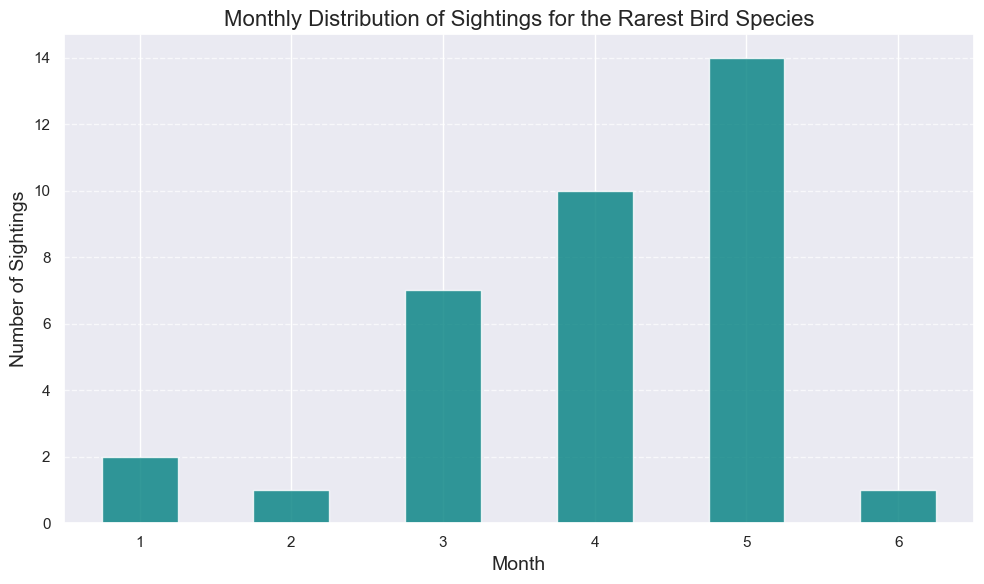

Month
1     2
2     1
3     7
4    10
5    14
6     1
dtype: int64


In [20]:
# Visualize 
plt.figure(figsize=(10, 6))
rare_bird_monthly.plot(kind='bar', color='teal', alpha=0.8)
plt.title("Monthly Distribution of Sightings for the Rarest Bird Species", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Sightings", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the data for verification
print(rare_bird_monthly)

#### Concolusion
From the chart we can see that May is the month at which most rare birds are sighted, closely followed by April and then Mars. 

#### Question 3: 
Where geographically are we most likely to encounter rare species?  

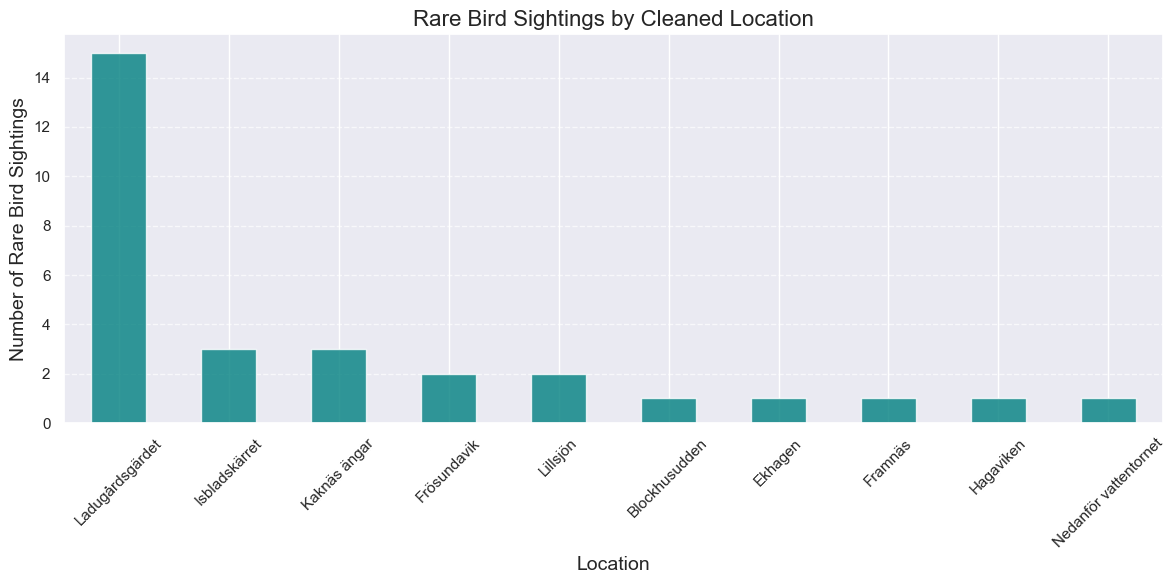

In [21]:
# Extract everything after the last comma (assumes city/region is at the end)
rare_bird_data['Cleaned_Location'] = rare_bird_data['Lokalnamn'].str.split(',').str[-1].str.strip()

# Group by the cleaned location
location_counts = rare_bird_data.groupby('Cleaned_Location').size()

# Create a bar plot
plt.figure(figsize=(12, 6))
location_counts.sort_values(ascending=False).head(10).plot(kind='bar', color='teal', alpha=0.8)
plt.title("Rare Bird Sightings by Cleaned Location", fontsize=16)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Number of Rare Bird Sightings", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Conclusion: 
In short then, it seems that the most rare birds are sighted in May at Ladugårdsgärdet in Stockholm. 

## Task 2. Exploring Stroke-Data
We want to do an exploration of the dataset and then generate some questions. 

In [22]:
df_st = pd.read_csv("stroke-data.csv")

df_st.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [23]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


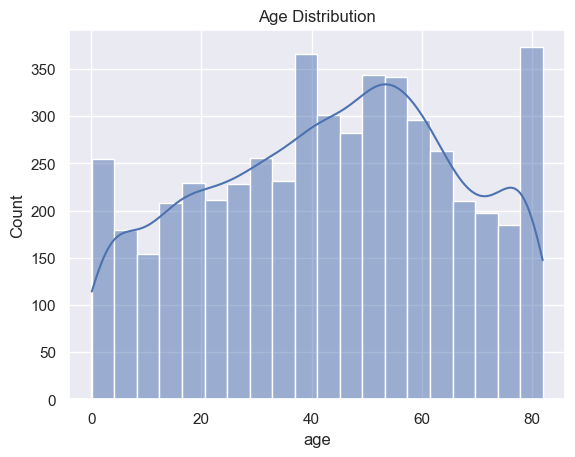

In [24]:
# Start with checking age distribution
sns.histplot(df_st['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

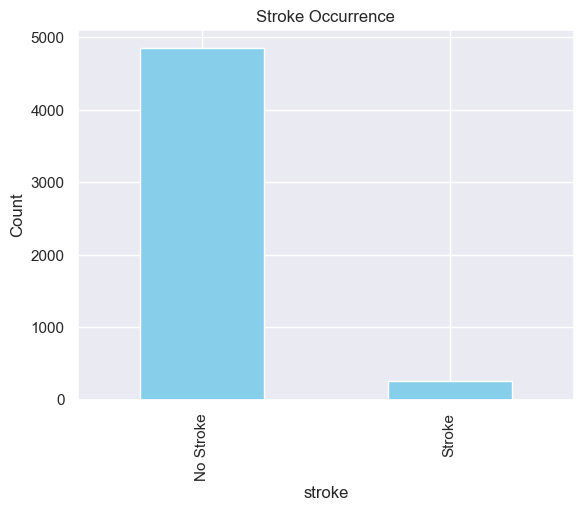

In [25]:
# Then we check stroke cases
df_st['stroke'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Stroke Occurrence')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.ylabel('Count')
plt.show()

### Question 1: What factors have the strongest correlation with stroke? 

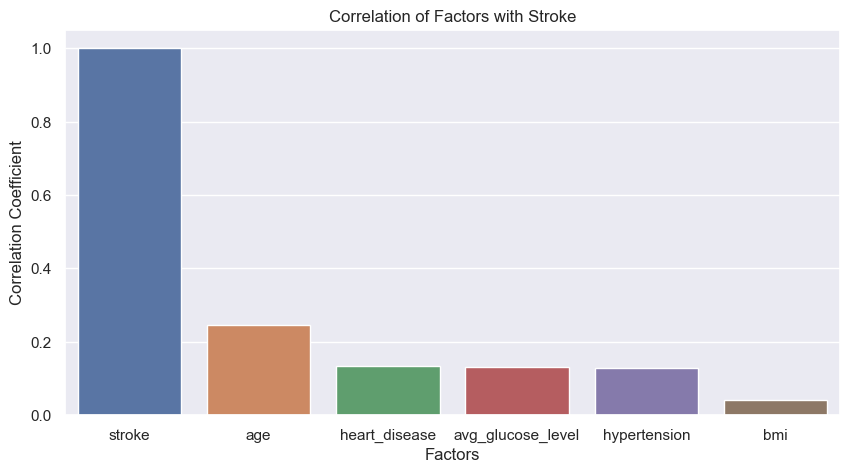

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64


In [26]:
# Calculate the correlation of relevant variables with the target variable (stroke)
correlation_with_stroke = df_st[['age', 'hypertension', 'heart_disease', 'stroke', 
                                 'avg_glucose_level', 'bmi']].corr()['stroke']

# Visualize correlations with a bar plot
correlation_with_stroke_sorted = correlation_with_stroke.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_stroke_sorted.index, y=correlation_with_stroke_sorted.values)
plt.title("Correlation of Factors with Stroke")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Factors")
plt.show()

# Print correlation values
print(correlation_with_stroke_sorted)

We can see that age has the strongest correlation with stroke while hypertension, heart disease and hypertension is moderately correlated with stroke. BMI seem to have a very low correlation with stroke. 

### Question 2: Does smoking have a correlation with stroke? 

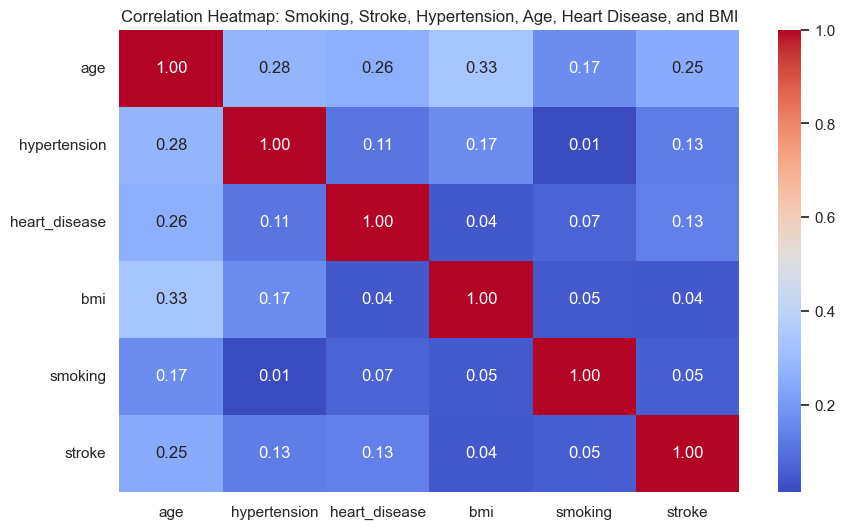

Correlation Matrix:
                    age  hypertension  heart_disease       bmi   smoking  \
age            1.000000      0.276398       0.263796  0.333398  0.166498   
hypertension   0.276398      1.000000       0.108306  0.167811  0.014140   
heart_disease  0.263796      0.108306       1.000000  0.041357  0.070451   
bmi            0.333398      0.167811       0.041357  1.000000  0.045627   
smoking        0.166498      0.014140       0.070451  0.045627  1.000000   
stroke         0.245257      0.127904       0.134914  0.042374  0.053748   

                 stroke  
age            0.245257  
hypertension   0.127904  
heart_disease  0.134914  
bmi            0.042374  
smoking        0.053748  
stroke         1.000000  


In [27]:
# Custom encoding for smoking_status
smoking_mapping = {'never smoked': 0, 'smokes': 1, 'formerly smoked': 2, 'Unknown': None}
df_st['smoking'] = df_st['smoking_status'].map(smoking_mapping)

# Select variables for correlation
columns_for_correlation = ['age', 'hypertension', 'heart_disease', 'bmi', 'smoking', 'stroke']
correlation_matrix = df_st[columns_for_correlation].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Smoking, Stroke, Hypertension, Age, Heart Disease, and BMI")
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Here we're using a similar idea to HW2 where we use a heatmap to show a correlation matrix to check for possible correlations between the factors. 
From the analysis here we can see that age have moderate correlation with heart disease, hypertension, which agrees with general medical findings. Also bmi seem to have some correlation. But smoking seem to have small correlation with all the factors here.  

We can dive a little further by filtering into a group of only smokers. 

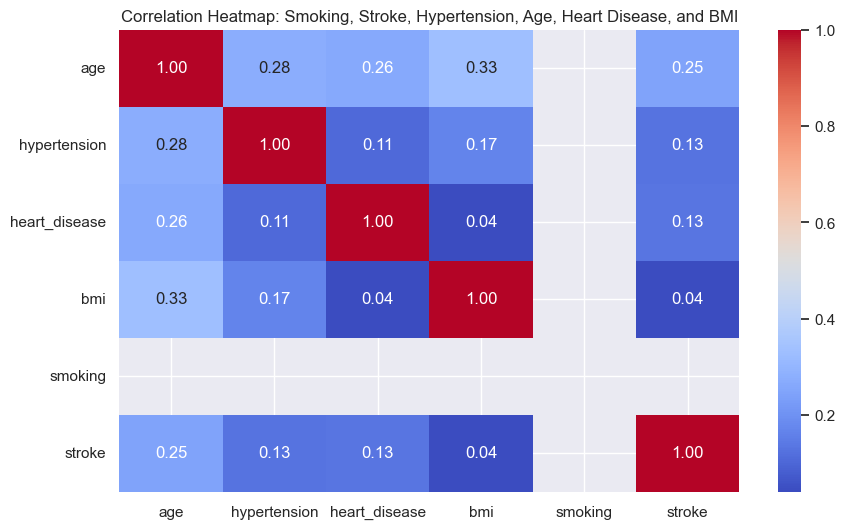

Correlation Matrix:
                    age  hypertension  heart_disease       bmi  smoking  \
age            1.000000      0.276398       0.263796  0.333398      NaN   
hypertension   0.276398      1.000000       0.108306  0.167811      NaN   
heart_disease  0.263796      0.108306       1.000000  0.041357      NaN   
bmi            0.333398      0.167811       0.041357  1.000000      NaN   
smoking             NaN           NaN            NaN       NaN      NaN   
stroke         0.245257      0.127904       0.134914  0.042374      NaN   

                 stroke  
age            0.245257  
hypertension   0.127904  
heart_disease  0.134914  
bmi            0.042374  
smoking             NaN  
stroke         1.000000  


In [28]:
# Custom encoding for smoking_status: smokes
smoking_mapping2 = {'smokes': 1}
df_st['smoking'] = df_st['smoking_status'].map(smoking_mapping2)

# Select variables for correlation
columns_for_correlation = ['age', 'hypertension', 'heart_disease', 'bmi', 'smoking', 'stroke']
correlation_matrix = df_st[columns_for_correlation].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Smoking, Stroke, Hypertension, Age, Heart Disease, and BMI")
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

We can see that this happens because we've set smoking status for smokes = 1, thereby making it impossible to calculate correlation values. So we can instead try to compare outcomes by grouping based on their smoking status and analyze that against stroke rates. 

Stroke Rates by Smoking Status:
smoking_status
Unknown            0.030440
formerly smoked    0.079096
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64


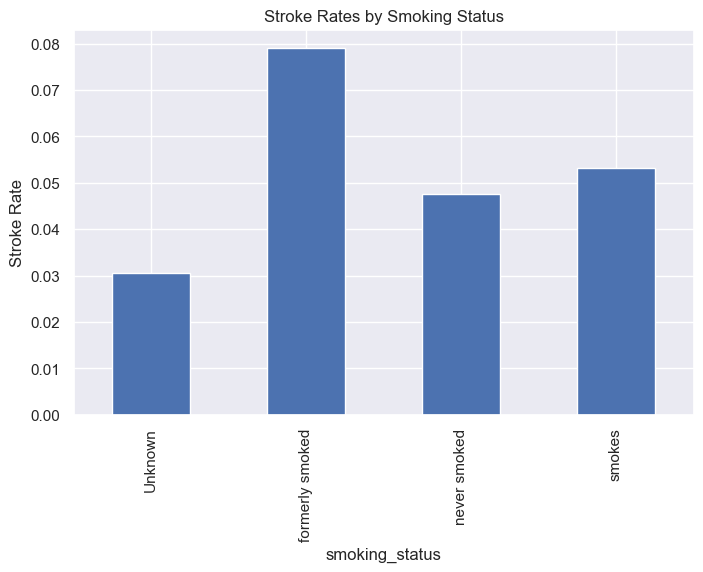

In [29]:
# Compare stroke rates by smoking status
stroke_rates = df_st.groupby('smoking_status')['stroke'].mean()
print("Stroke Rates by Smoking Status:")
print(stroke_rates)

# Bar plot for visualization
stroke_rates.plot(kind='bar', figsize=(8, 5), title="Stroke Rates by Smoking Status")
plt.ylabel("Stroke Rate")
plt.show()

From this barplot we can see that the group "formerly smoked" seem to have an increased rate of stroke compared to the others, while smokes have a moderate increased stroke rate. 

### Question 3 Can we find correlation between work type and stroke? 

To do this we can count the number of individuals who belong to the different work types and then calculate the stroke rate for each group. Then reassign numeric values to each work type to calculate correlation and finally attempt a chi-squared test to see if we can conclude anything. 

Stroke Rates by Work Type:
work_type
Govt_job         0.050228
Never_worked     0.000000
Private          0.050940
Self-employed    0.079365
children         0.002911
Name: stroke, dtype: float64


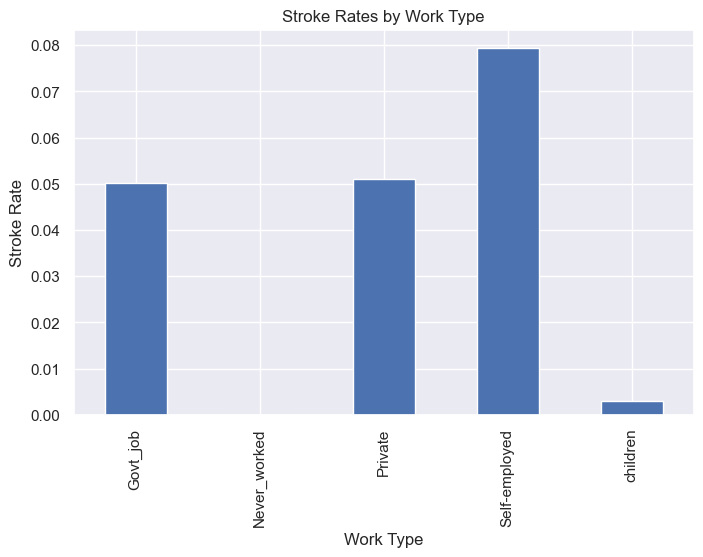

In [30]:
# Calculate stroke rates for each work type
work_type_stroke_rates = df_st.groupby('work_type')['stroke'].mean()
print("Stroke Rates by Work Type:")
print(work_type_stroke_rates)

# Visualize stroke rates by work type
work_type_stroke_rates.plot(kind='bar', figsize=(8, 5), title="Stroke Rates by Work Type")
plt.ylabel("Stroke Rate")
plt.xlabel("Work Type")
plt.show()

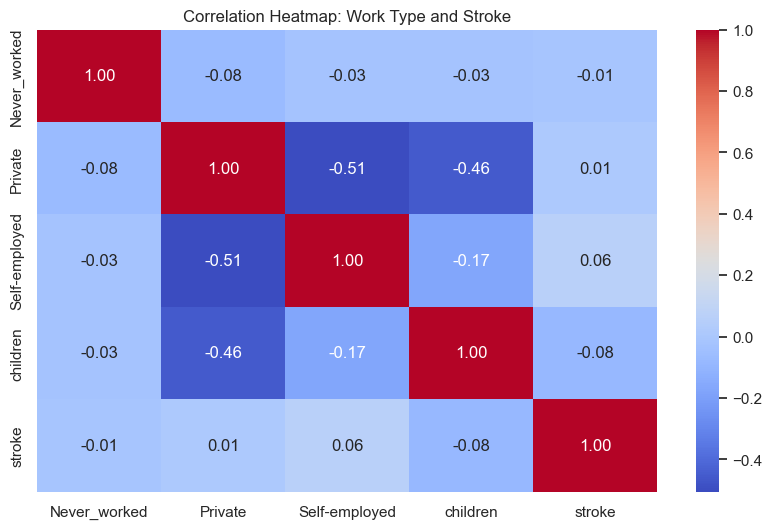

In [31]:
# One-hot encode work_type
work_type_encoded = pd.get_dummies(df_st['work_type'], drop_first=True)

# Add the encoded columns to the dataset
stroke_data_encoded3 = pd.concat([df_st, work_type_encoded], axis=1)

# Select variables for correlation
columns_for_correlation = list(work_type_encoded.columns) + ['stroke']
correlation_matrix = stroke_data_encoded3[columns_for_correlation].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Work Type and Stroke")
plt.show()

From the heatmap above we can see that the highest correlation with stroke comes from self-employed. Although pretty weak it could suggest that being self-employed increased the risk of stroke slightly

In [32]:
from scipy.stats import chi2_contingency

# Create a contingency table for work_type and stroke
contingency_table = pd.crosstab(df_st['work_type'], df_st['stroke'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation:
if p < 0.05:
    print("There is a significant association between work type and stroke.")
else:
    print("There is no significant association between work type and stroke.")

Chi-Square Test Results:
Chi-Square Statistic: 49.163511976675295
P-value: 5.397707801896119e-10
There is a significant association between work type and stroke.


So from the Chi-Squared Test we can conclude that there is a significant association between work type and stroke. This is very hand-wavey and we could easily have continued this analysis deeper by diving into relationships between work types and heart diseases, hypertension and so on. In general a very very weak conclusion but still interesting. 

## Task 3: Exploring Cellphone Data

In [33]:
# Load the raw CSV file
df_raw = pd.read_csv("cell_phones_total.csv")

# Display the first few rows to understand the structure
print(df_raw.head())

  iso-3  1960  1965  1966  1967  1968  1969  1970  1971  1972  ...   2010  \
0   ABW   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...   132k   
1   AFG   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  10.2M   
2   AGO   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...   9.4M   
3   ALB   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  2.69M   
4   AND   0.0   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...  65.5k   

    2011   2012   2013   2014   2015   2016   2017   2018   2019  
0    NaN   135k   139k   140k   141k    NaN    NaN    NaN    NaN  
1  13.8M  15.3M  16.8M  18.4M  19.7M  21.6M  23.9M    22M  22.6M  
2  12.1M  12.8M  13.3M  14.1M  13.9M    13M  13.3M  13.3M  14.8M  
3   3.1M   3.5M  3.69M  3.36M   3.4M  3.37M  3.63M  2.71M  2.63M  
4    65k  63.9k  63.9k  66.2k  71.3k  76.1k  80.3k  82.6k  87.9k  

[5 rows x 57 columns]


In [35]:
# function to handle 'k', 'M', 'B' values
def convert_to_numeric(value):
    """Convert string values with 'k', 'M', 'B' to numeric."""
    if isinstance(value, str):
        if value.endswith('k'):
            return float(value[:-1]) * 1e3
        elif value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
    return value

In [36]:
# Exclude `iso-3` from numeric conversion
for col in df_raw.columns[1:]: # goes through columns 0> 
    df_raw[col] = df_raw[col].apply(convert_to_numeric)  # Convert 'k', 'M', 'B' values
    df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')  # Coerce non-numeric to NaN

In [37]:
# Interpolate missing values for numeric columns only using the pandas interpolate to replace
# missing values. 
numeric_columns = df_raw.columns[1:]  # Exclude `iso-3`
df_raw[numeric_columns] = df_raw[numeric_columns].interpolate(axis=1, limit_direction='forward')

In [38]:
# Drop columns with all missing values
df_cleaned = df_raw.dropna(axis=1, how='all')

In [40]:
print(df_cleaned.head(15))

   iso-3  1960  1965  1966  1967  1968  1969  1970  1971  1972  ...  \
0    ABW   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1    AFG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2    AGO   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3    ALB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4    AND   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5    ARE   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6    ARG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7    ARM   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
8    ASM   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
9    ATG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
10   AUS   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
11   AUT   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
12   AZE   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
13   B